In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
# training_pth = "./train"
# testing_pth = "./test"

# sample_pth = "./train/00hgi3n7-0.png"
# hard_pth = "./train/n2ujhk0b-0.png"
# sample2_pth = "./train/0lfjfob-0.png"
# tough_pth = "./image.png"
sample_path = "./test-cases/lines.png"

img = cv2.imread(sample_path)
show(img)

ImportError: DLL load failed while importing cv2: The specified module could not be found.

In [ ]:
lower_black = np.array([0, 0, 0])
upper_black = np.array([50, 50, 50])  # Adjust as needed based on line intensity

# Convert the image to a mask where black lines are white (255) and other areas are black (0)
mask = cv2.inRange(img, lower_black, upper_black)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show(gray)
gray

bw_img = np.uint8(np.where(gray!=255,255,0))
show(bw_img)


# Step 2: Use inpainting to remove the black lines based on the mask
# cv2.INPAINT_TELEA and cv2.INPAINT_NS are two methods for inpainting
# TELEA is generally faster and works well for small, linear noise like lines
img_inpainted = cv2.inpaint(img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Display results
show(img)
show(mask)
show(img_inpainted)





NameError: name 'np' is not defined

In [ ]:
gray = cv2.cvtColor(img_inpainted,cv2.COLOR_BGR2GRAY)
show(gray)
gray

test = np.uint8(np.where(gray!=255,255,0))
show(test)


# output = cv2.connectedComponentsWithStats(test,8, cv2.CV_32S)
# (numLabels, labels, stats, centroids) = output

error: OpenCV(4.10.0) C:\b\abs_daut97tdpo\croot\opencv-suite_1722029138522\work\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xaa65d054::Set<1,-1,-1>,struct cv::impl::A0xaa65d054::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


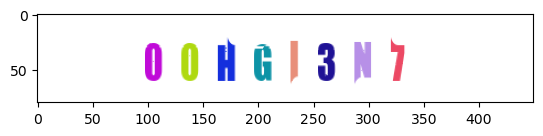

In [ ]:
def fill_sandwiched_pixels(img, mask):
    # Create a copy of the image to modify
    img_filled = img.copy()

    # Get image dimensions
    height, width, _ = img.shape

    # Iterate through all pixels
    for y in range(1, height - 1):  # Start from 1 and go to height-1 to avoid edges
        for x in range(1, width - 1):  # Start from 1 and go to width-1 to avoid edges
            if mask[y, x] != 0:  # Check if this pixel was originally black
                # Initialize variables to hold surrounding pixel values
                pixel_above = img[y - 1, x]
                pixel_below = img[y + 1, x]
                pixel_left = img[y, x - 1]
                pixel_right = img[y, x + 1]
                pixel_top_left = img[y - 1, x - 1]
                pixel_bottom_right = img[y + 1, x + 1]
                pixel_top_right = img[y - 1, x + 1]
                pixel_bottom_left = img[y + 1, x - 1]

                # Check the conditions for each pair of surrounding pixels
                # 1. Top and Bottom
                if np.all(pixel_above != [255, 255, 255]) and np.all(pixel_below != [255, 255, 255]):
                    new_pixel = pixel_above
                    img_filled[y, x] = new_pixel
                
                # 2. Left and Right
                elif np.all(pixel_left != [255, 255, 255]) and np.all(pixel_right != [255, 255, 255]):
                    new_pixel = pixel_right
                    img_filled[y, x] = new_pixel
                
                # 3. Top-Left and Bottom-Right
                elif np.all(pixel_top_left != [255, 255, 255]) and np.all(pixel_bottom_right != [255, 255, 255]):
                    new_pixel = pixel_top_left
                    img_filled[y, x] = new_pixel
                
                # 4. Top-Right and Bottom-Left
                elif np.all(pixel_top_right != [255, 255, 255]) and np.all(pixel_bottom_left != [255, 255, 255]):
                    new_pixel = pixel_bottom_left
                    img_filled[y, x] = new_pixel

    return img_filled

# Apply custom function to fill sandwiched pixels
img_filled = fill_sandwiched_pixels(img, mask)

# Show the final output
show(img_filled)

In [ ]:
output = cv2.connectedComponentsWithStats(img_inpainted,8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

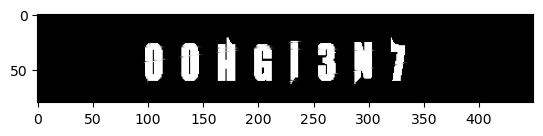

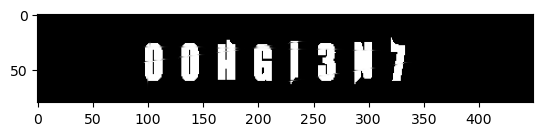

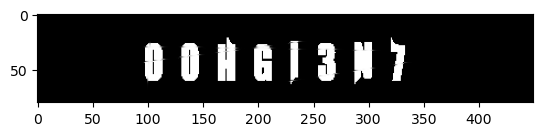

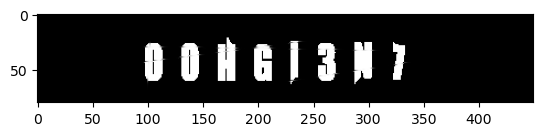

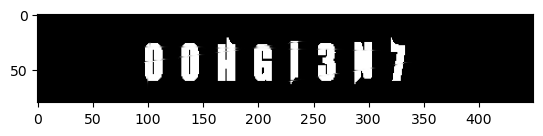

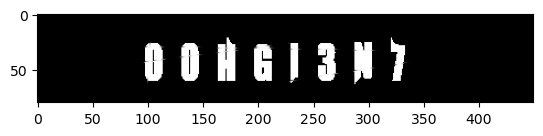

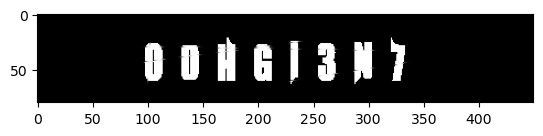

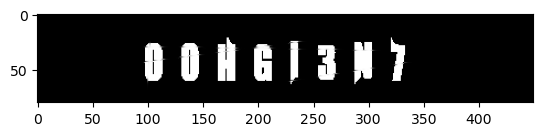

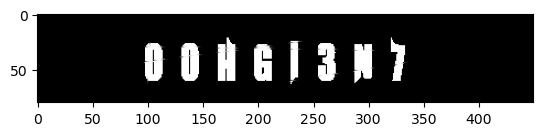

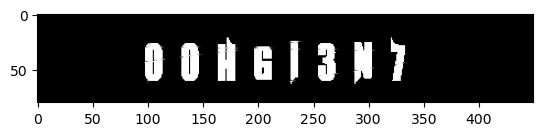

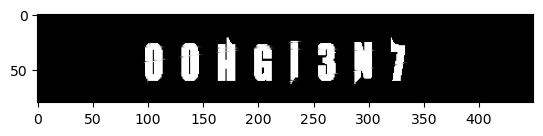

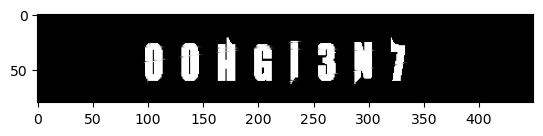

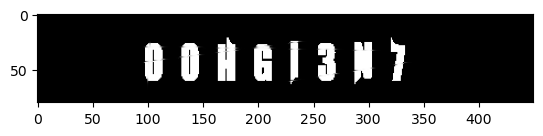

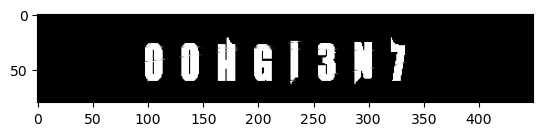

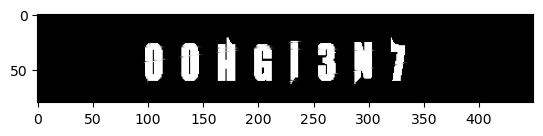

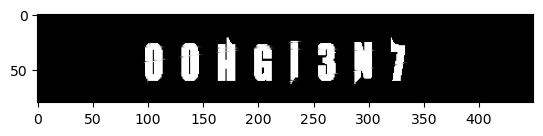

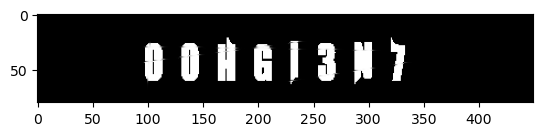

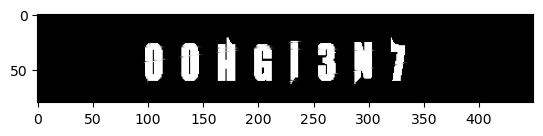

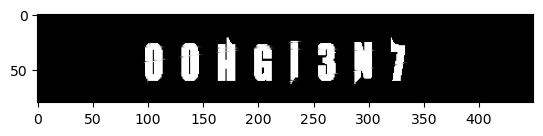

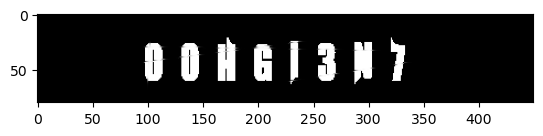

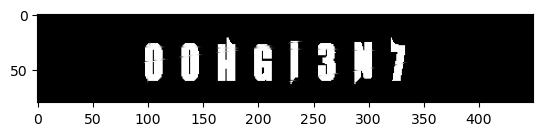

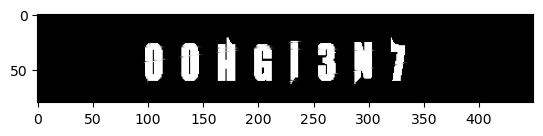

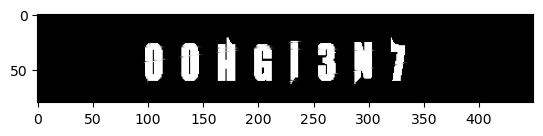

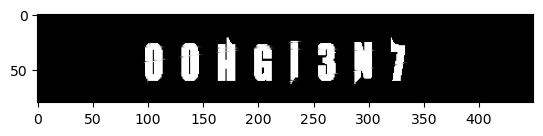

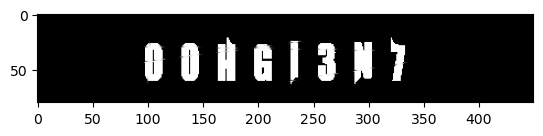

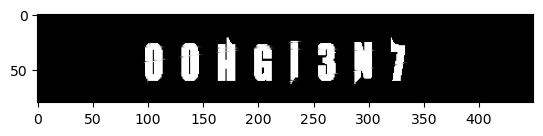

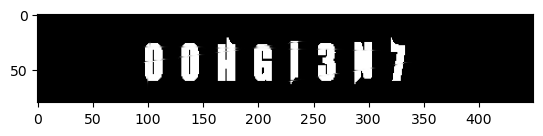

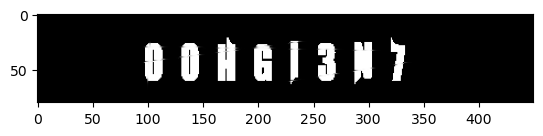

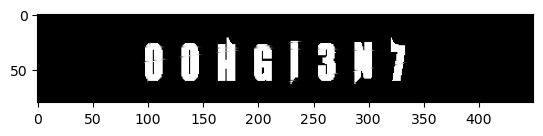

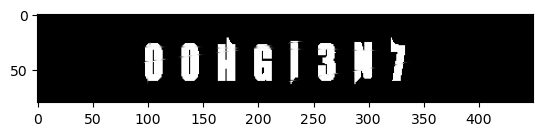

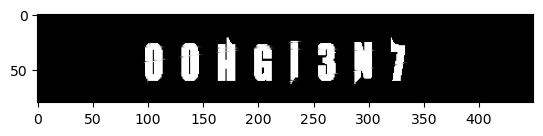

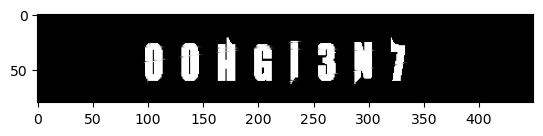

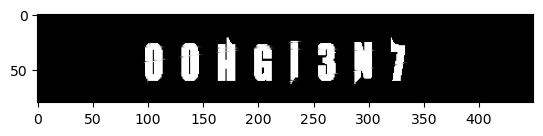

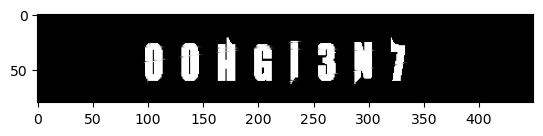

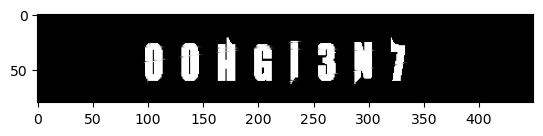

In [ ]:
connected_region_area = []
connected_pos=[]
for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	# print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	output = img_inpainted.copy()
	connected_region_area.append((w*h))
	connected_pos.append([x,y,w,h])
	test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)	
	show(test_out)
	# show(img[y:y+h, x:x+w])
	# show(img_filled[y:y+h, x:x+w])

In [ ]:
connected_pos

[[0, 0, 450, 80],
 [164, 22, 16, 39],
 [321, 22, 13, 39],
 [230, 25, 7, 39],
 [98, 27, 16, 34],
 [131, 27, 16, 34],
 [255, 27, 16, 34],
 [288, 26, 16, 38],
 [197, 28, 16, 33]]

In [ ]:
connected_region_area

[36000, 624, 507, 273, 544, 544, 544, 608, 528]

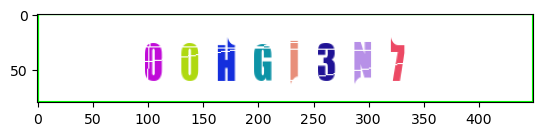

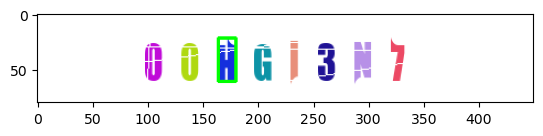

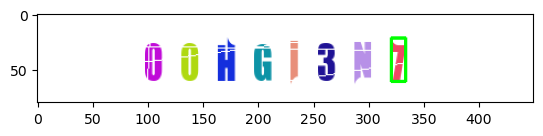

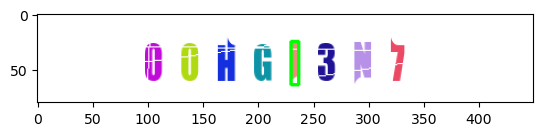

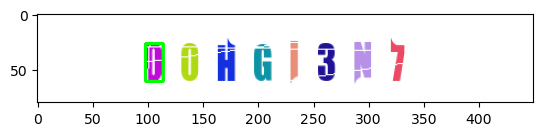

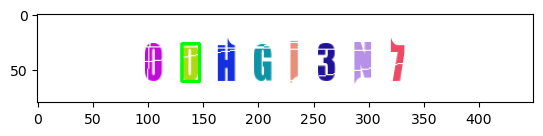

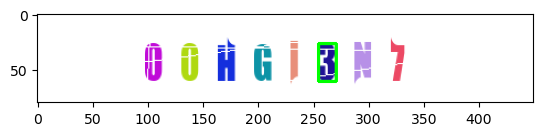

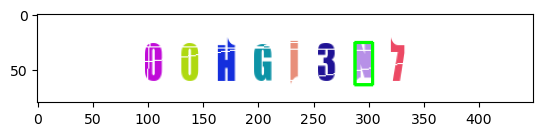

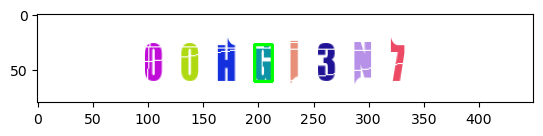

In [ ]:
for  x,y,w,h in connected_pos:
    output= img.copy() 
    test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)	
    show(test_out)

In [ ]:
selected_region = []
print(len(connected_region_area))
for i in range(len(connected_region_area)):
    if connected_region_area[i] > 100 and connected_region_area[i] < 600:
        selected_region.append(i)
selected_region

9


[2, 3, 4, 5, 6, 8]

In [ ]:
selected_connected_roi  = [connected_pos[i] for i in selected_region]

In [ ]:
selected_connected_roi

[[321, 22, 13, 39],
 [230, 25, 7, 39],
 [98, 27, 16, 34],
 [131, 27, 16, 34],
 [255, 27, 16, 34],
 [197, 28, 16, 33]]

In [ ]:
sorted_roi = sorted(selected_connected_roi, key=lambda x: x[0])

In [ ]:
sorted_roi

[[98, 27, 16, 34],
 [131, 27, 16, 34],
 [197, 28, 16, 33],
 [230, 25, 7, 39],
 [255, 27, 16, 34],
 [321, 22, 13, 39]]

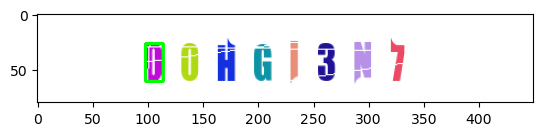

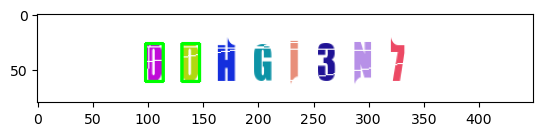

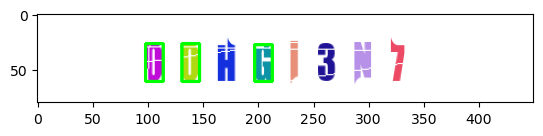

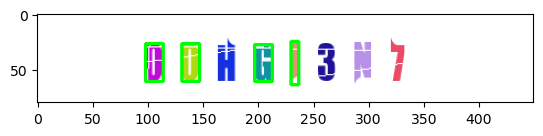

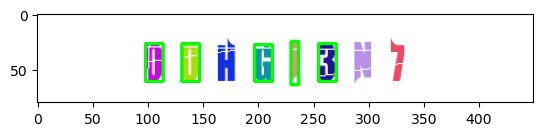

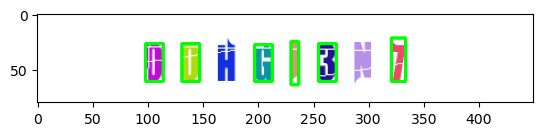

In [ ]:
output = img.copy() 
for i in sorted_roi:
    (x,y,w,h) = i
    test_out = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
    show(test_out)

In [ ]:
saved_part = []
pad = 3
for i in sorted_roi:
    (x,y,w,h) = i
    saved_part.append(img_filled[y-pad:y+h+pad,x-pad:x+w+pad])

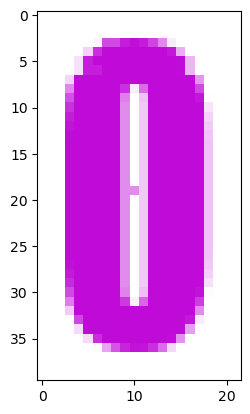

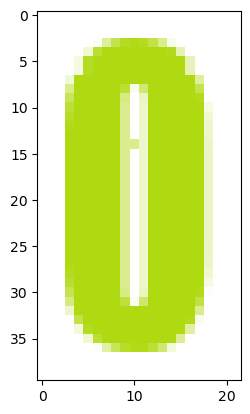

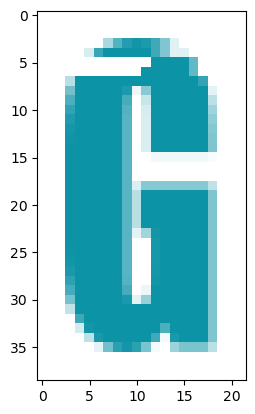

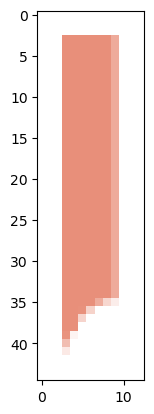

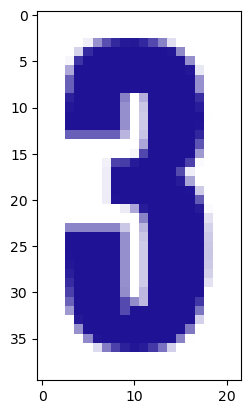

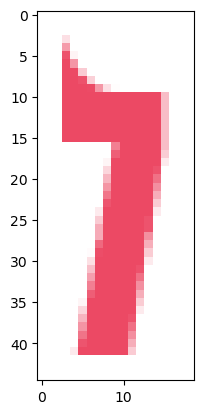

In [ ]:
for i in saved_part:
    show(i)